In [1]:
from ase.io import read, write
from ase.visualize import view
from ase.build.molecule import molecule
from ase.io import write
from ase.io.pov import get_bondpairs, set_high_bondorder_pairs
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import os

## Mixing ligands with inorganic frameworks: 3-amino inorganics with benzene
Here, the 3-amino inorganic framework is left untouched. The orientations and angles of the ligands with respect to S are also maintained, with the modification being that benzene-$NH_2$ is replaced with just regular benzene.

<Axes: >

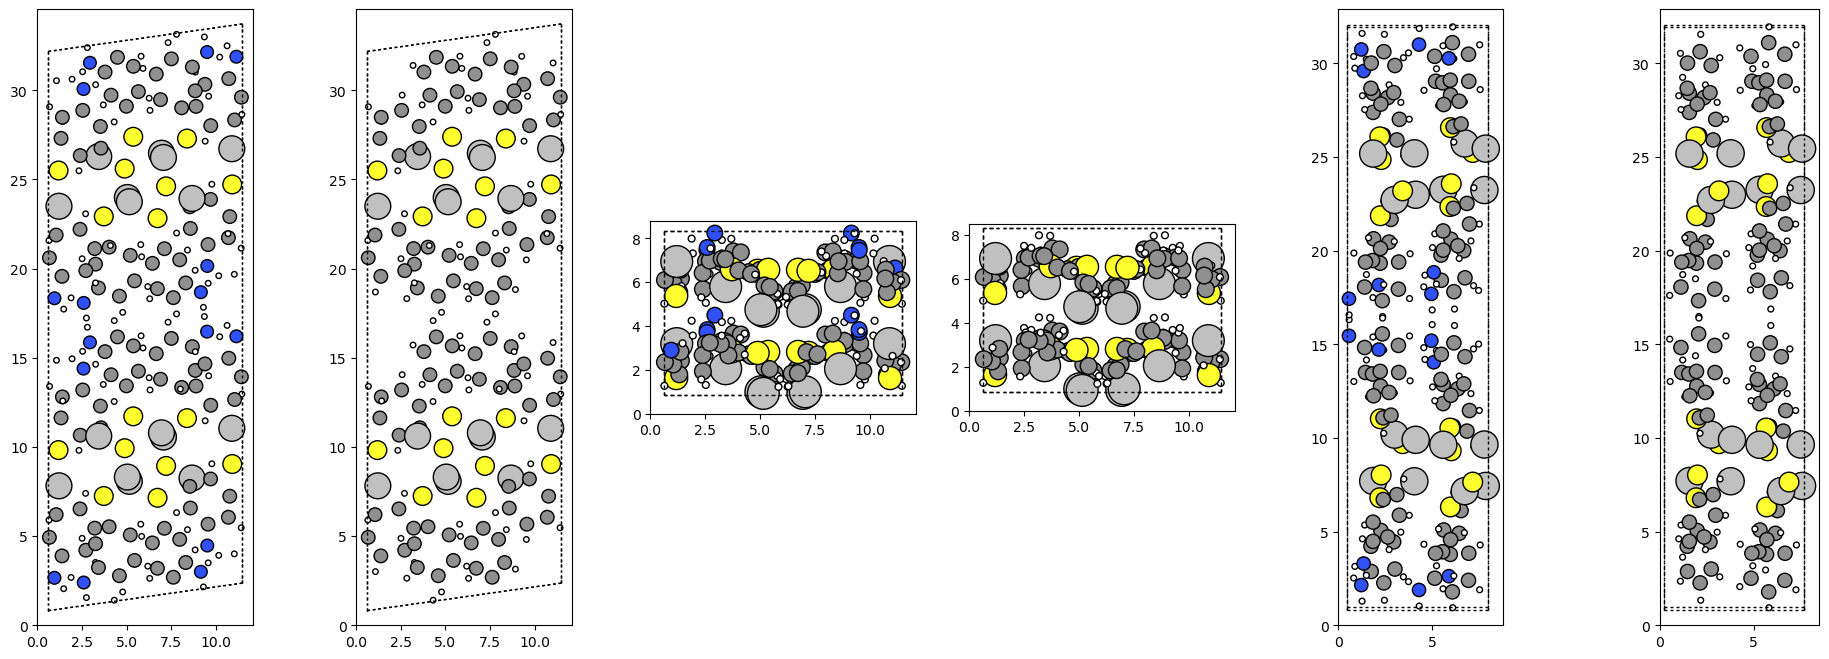

In [202]:
path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/original_structures/3amino/"

amino3 = read(f'{path}POSCAR')

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/3-amino_benzene/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

amino3_benzene = read(f'{path}POSCAR')
fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(amino3, ax[0], radii=0.5, rotation=('90x,0y,90z'))
plot_atoms(amino3_benzene, ax[1], radii=0.5, rotation=('90x,0y,90z'))
plot_atoms(amino3, ax[2], radii=0.5, rotation=('0x,90y,0z'))
plot_atoms(amino3_benzene, ax[3], radii=0.5, rotation=('0x,90y,0z'))
plot_atoms(amino3, ax[4], radii=0.5, rotation=('0x,352.5y,90z'))
plot_atoms(amino3_benzene, ax[5], radii=0.5, rotation=('0x,352.5y,90z'))

## Mixing ligands with inorganic frameworks: Mithrene with amines 

In [3]:
path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/original_pre-relaxed/mithrene/"

mithrene = read(f'{path}POSCAR.vasp')
fig, ax = plt.subplots(1,3, figsize=(12,8))
# plot_atoms(mocha, ax[0], radii=0.5, rotation=('0x,0y,90z'))
plot_atoms(mithrene, ax[0], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(mithrene, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mithrene, ax[2], radii=0.5, rotation=('0x,5.5y,90z'))

print(mithrene.get_positions())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/adrianaladera/Desktop/MIT/research/MOChAs/original_pre-relaxed/mithrene/POSCAR.vasp'

## Exercise: joining together molecules that are Atoms objects

Form ethanol from $C_2H_5$ and $OH$

<Axes: >

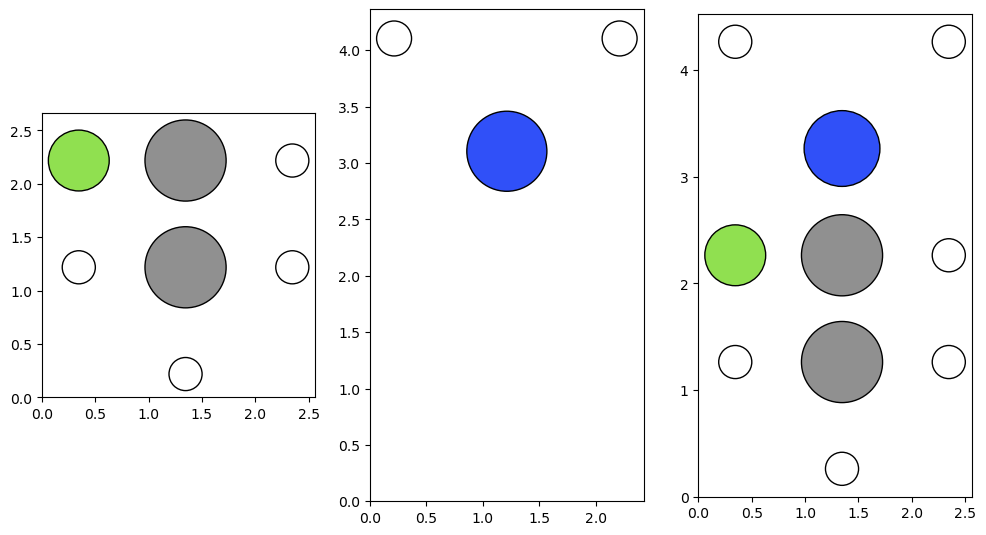

In [12]:
import ase.build.attach as attach
from ase import Atoms

c2h5 = Atoms('C2H4F', [(1, 1, 0), (2, 1, 0), (0, 1, 0), (1,0,0), (1,2,0), (2,0,0), (2,2,0)])
oh = atoms = Atoms('NH2', [(3, 1, 0), (4, 2, 1), (4,0,1)])
ethanol = attach.attach(c2h5, oh, distance=1, direction=(0,0,-1), maxiter=50, accuracy=1e-05)

fig, ax = plt.subplots(1,3, figsize=(12,8))
plot_atoms(c2h5, ax[0], radii=0.5, rotation=('0x,0y,90z'))
plot_atoms(oh, ax[1], radii=0.5, rotation=('0x,0y,90z'))
plot_atoms(ethanol, ax[2], radii=0.5, rotation=('0x,0y,90z'))
# view(ethanol, viewer='x3d')

## Exercise: joining together molecules to form a ligand

Join together benzene and $NH_2$ by replacing one of the H on benzene with an amine group

In [13]:
def get_components(c0, c1):
    '''Parameters:
        - c0: list of Cartesian coordinates for neighboring atom
        - c1: list of Cartesian coordinates for atom to be replaced 
        Returns:
        -  x, y, z components of vector between both sets of coordinates'''
    return (c1[0]-c0[0], c1[1]-c0[1], c1[2]-c0[2])

In [1]:
from ase.build import molecule

benzene = molecule('C6H6')
amine = molecule('NH2')
ligma = molecule('C6H6')

amine.rotate(90, 'y')
amine.rotate(-25, 'z')
vec = get_components(ligma.get_positions()[5], ligma.get_positions()[11])
print(vec, ligma.get_positions()[5], ligma.get_positions()[11])
ligma.pop()
ligma.pop(len(ligma)-2)

ligand = attach.attach(ligma, amine, distance=1.4, direction=(vec[0],vec[1],vec[2]), maxiter=50, accuracy=1e-05)

fig, ax = plt.subplots(1,3, figsize=(12,8))
plot_atoms(benzene, ax[0], radii=0.5, rotation=('0x,0y,0z'))
plot_atoms(amine, ax[1], radii=0.5, rotation=('0x,00y,0z'))
plot_atoms(ligand, ax[2], radii=0.5, rotation=('0x,0y,0z'))
view(ligand, viewer='x3d')

NameError: name 'get_components' is not defined

In [135]:
H = Atoms('H')
amine = molecule('NH2')
print(amine.get_chemical_symbols(),amine.get_positions())

['N', 'H', 'H'] [[ 0.        0.        0.14169 ]
 [ 0.        0.806442 -0.495913]
 [ 0.       -0.806442 -0.495913]]


### Exercise: Adding amines to an existing mocha framework and translating them

<Axes: >

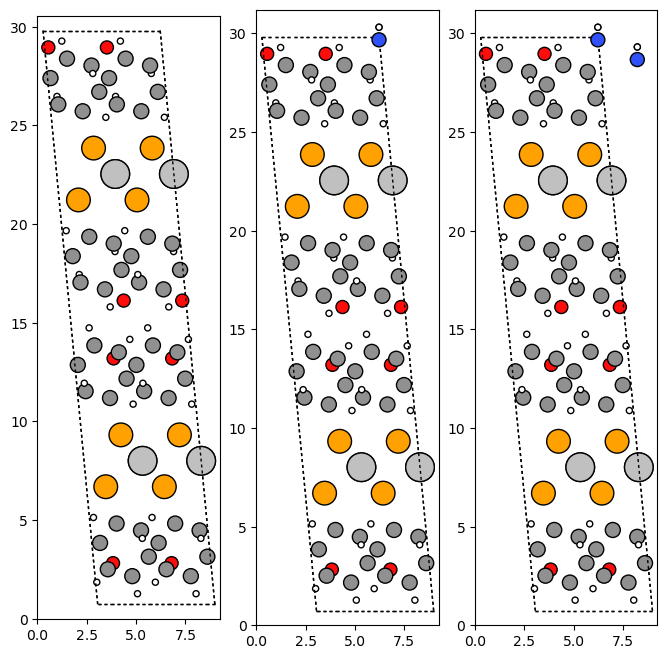

In [140]:
from ase.neighborlist import NeighborList
import math as meth
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

fig, ax = plt.subplots(1,3, figsize=(8,8))
mithamine = read(f'{path}POSCAR') # is an atoms object so it can be modified!
plot_atoms(mithamine, ax[0], radii=0.5, rotation=('90x,180y,0z'))
Cl = Atoms('Cl', positions=[[0.012123,-.019239,1.20309]])
amine = molecule('NH2')
mithamine.extend(amine)
plot_atoms(mithamine, ax[1], radii=0.5, rotation=('90x,180y,0z'))
amine.translate([-2,0,1])
mithamine.extend(amine)


plot_atoms(mithamine, ax[2], radii=0.5, rotation=('90x,180y,0z'))

In [3]:
def plane_equation(p1, p2, p3): # this is apparently wrong
    v1 = np.array(p2) - np.array(p1)
    v2 = np.array(p3) - np.array(p1)
    equation = np.cross(v1, v2)
    # equation = np.cross(v1, v2) / np.gcd.reduce(np.cross(v1, v2))
    equation = np.append(equation, np.dot(equation, p3))
    return equation

## Exercise: Add amines and rotate to be in plane with benzene (from mithrene POSCAR file)

In [22]:
# def angle_between(v1, v2):
#     v1, v2 = np.array(v1), np.array(v2)
#     theta = np.degrees((np.pi/2) - (np.arccos((np.dot(v1,v2)) / (np.linalg.norm(v1)*np.linalg.norm(v2)))))
#     # if theta < 90:
#     #     return 180.0 - theta
#     return theta

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

### Checking how the planes and vectors look in matplotlib (dormant)

(0.0, 0.806442, -0.637603) (0.0, -0.806442, -0.637603) [[ 0.        0.        0.14169 ]
 [ 0.        0.806442 -0.495913]
 [ 0.       -0.806442 -0.495913]] 103.33758782393065
(0.0, 0.806442, -0.637603) (0.0, -0.806442, -0.637603) [[ 0.          0.12102816  0.07367659]
 [ 0.         -0.00425959 -0.94671023]] 103.33758782393065
113.86032281617369


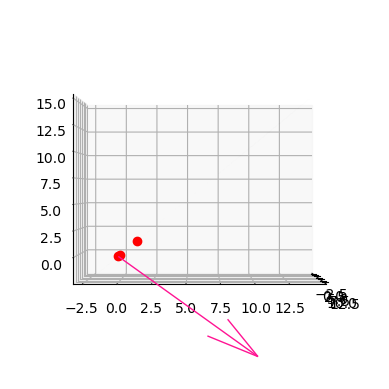

In [87]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

ligma = molecule('C6H6')
benzene = molecule('C6H6')
ligma.rotate(47, 'x')
amine = molecule('NH2')

# print(ligma.get_chemical_symbols())
# ligma.pop()
# ligma.pop(5)


C_indices = np.array([5])
plane_indices = np.array([[32,48,16]])
cunt = 0
O_positions = []
num_O = 0
u_vecs, v_vecs = [], []
# for atom in ligand:
#     if atom.symbol == 'O':
u = plane_equation(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4])
a,b,c,d = u[0],u[1],u[2], u[3]
u_vecs.append(u[:-1])
O_positions.append(ligma.get_positions()[len(ligma)-1])
# O_positions.append(ligand.get_positions()[atom.index])
num_O += 1
cunt += 1

# for O in range(num_O):
#     ligand.pop()
ligma.pop()

ligno_O = cp.copy(ligma)
# fig, ax = plt.subplots(1,6, figsize=(24,8))
# plot_atoms(benzene, ax[0], radii=0.5, rotation=('90x,180y,0z'))
# plot_atoms(ligno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
# plot_atoms(benzene, ax[3], radii=0.5, rotation=('90x,90y,0z'))
# plot_atoms(ligno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))

cunt = 0
for C,O,u in zip(C_indices, O_positions, u_vecs):
    amine = molecule('NH2')
    amine_direction = Atoms('NH', [amine.get_positions()[0], amine.get_positions()[1]]) 
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    H2_vec = get_components(amine.get_positions()[0], amine.get_positions()[2])
    amangle = angle_between(H1_vec, H2_vec)
    print(H1_vec, H2_vec, amine.get_positions(), amangle)
    amine_direction.rotate(amangle/2.0 + 7, '-x')
    amineH = Atoms('H', [amine_direction.get_positions()[1]])
    print(H1_vec, H2_vec, amine_direction.get_positions(), amangle)
    amine.extend(amineH)
#     amine.pop()

# fig, ax = plt.subplots(1, figsize=(24,8))
# plot_atoms(amine, ax, radii=0.5, rotation=('90x,90y,0z'))


    # IDEA:
    # - get angle between amines prior to rotating (easy because it's in plane with the x axis)
    # - find half angle and rotate H vector to be in the middle of the NH2 (at the half angle)
    # - use H vector to calculate the proper rotations between planes and shit
    # - whatever rotations applied to H should also be applied to the amine!
    # - hopefully this will get the amine to rotate fucking properly

    # print(amine.get_positions())
    # amine.rotate(180,'z', center=amine.get_positions()[0])
    v = get_components(O, ligma.get_positions()[C]) # get angle between vector and plane
    # print(amine.get_positions())
    # H_plane = plane_equation(amine.get_positions()[0], amine.get_positions()[1], amine.get_positions()[2]) # rotate H until || with v vector
    # H_vec = get_components(amine.get_positions()[0], amine.get_positions()[3])
    H_vec = get_components(amine_direction.get_positions()[0], amine_direction.get_positions()[1])
    theta = angle_between(H_vec, v)
    if theta < 90.0:
        theta = 180.0 - theta
    print(theta)
    # # to rotate around a vector perpendicular to plane, just use plane coefficients
    amine_direction.rotate(theta, u)
    # amine.rotate(theta, u)
    # print(ligma.get_chemical_symbols())
    # C_vec = get_components(ligma.get_positions()[4], ligma.get_positions()[5])
    # sigma = angle_between(H_vec, C_vec)
    # # if sigma < 90.0:
    # sigma = 180.0 - sigma
    # print(sigma)
    # # # to rotate around a vector perpendicular to plane, just use plane coefficients
    # amine.rotate(sigma, v)
    # print(H_plane, v,theta, u)
    T = get_components(amine.get_positions()[0], O)
    amine.translate(T)
    
    ligma.extend(amine)

    x = np.linspace(-2, 14, 5)
    y = np.linspace(-2, 14, 5)
    X, Y = np.meshgrid(x, y)

    Z = (d - a * X - b * Y) / c

    # plot the mesh. Each array is 2D, so we flatten them to 1D arrays
    ax.plot_surface(X, Y, Z)
    ax.plot(*zip(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4]), color='r', linestyle=' ', marker='o')
    ax.quiver([ligma.get_positions()[2][0]], [ligma.get_positions()[2][1]], [ligma.get_positions()[2][2]], [u[0]], [u[1]], [u[2]], colors=['#FF1493'], length=3, linewidth=1)
    ax.view_init(0, 0)

    cunt += 1


plt.show()
# plot_atoms(ligma, ax[2], radii=0.5, rotation=('90x,180y,0z'))
# plot_atoms(ligma, ax[5], radii=0.5, rotation=('90x,90y,0z'))

### Practice translating and rotating amines to attach to benzene in ASE



In [145]:
def get_angle_cos(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.degrees(np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

def get_angle_sin(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.degrees(np.arcsin(np.cross(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

print(get_angle_cos([0,69,0],[69,0,0]))
print(get_angle_sin([0,69,0],[69,0,0]))

def get_plane_angle(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.abs(np.degrees(np.arcsin(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))))

90.0
[  0.   0. -90.]


# Trying to rotate vector 'a' into another vector 'v' (This works! Now trying to extend to longer version ang write generalized function)

In [2]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

ligma = molecule('C6H6')
benzene = molecule('C6H6')
ligma.rotate(47, 'x')
# ligma.rotate(69, 'y')
# ligma.rotate(128, '-z')
amine = molecule('NH2')

# print(ligma.get_chemical_symbols())
# ligma.pop()
# ligma.pop(5)


C_indices = np.array([5])
plane_indices = np.array([[32,48,16]])
cunt = 0
O_positions = []
num_O = 0
u_vecs, v_vecs = [], []
# for atom in ligand:
#     if atom.symbol == 'O':
u = plane_equation(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4])
# print(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4], u)
u_vecs.append(u[:-1])
O_positions.append(ligma.get_positions()[len(ligma)-1])
# O_positions.append(ligand.get_positions()[atom.index])
num_O += 1
cunt += 1

# for O in range(num_O):
#     ligand.pop()
ligma.pop()

ligno_O = cp.copy(ligma)
fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(benzene, ax[0], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(benzene, ax[3], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(ligno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))

cunt = 0
for C,O,u in zip(C_indices, O_positions, u_vecs):
    amine = molecule('NH2') # initially in the yz plane
    print(amine.get_chemical_symbols())
    amine_direction = Atoms('NH', [amine.get_positions()[0], amine.get_positions()[1]]) 
    U_vec = Atoms('CF', [ligma.get_positions()[5], ligma.get_positions()[6]])
    uv = get_components(ligma.get_positions()[5], ligma.get_positions()[6])
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    H2_vec = get_components(amine.get_positions()[0], amine.get_positions()[2])
    amangle = get_angle_cos(H1_vec, H2_vec)
    # print(H1_vec, H2_vec, amine.get_positions(), amangle)
    amine_direction.rotate(amangle/2.0, '-x') # angles are valid but apparently just don't look like it from the visualization
    H_vec = get_components(amine_direction.get_positions()[0], amine_direction.get_positions()[1])
    # uv = 
    U_vec.rotate(uv, u)
    # amine_direction.pop(0)
    U_dot = Atoms('F', [U_vec.get_positions()[1]])
    ligma.extend(U_dot)
    # amineCl = Atoms('Cl', [amine_direction.get_positions()[1]])
    # print(H1_vec, H2_vec, amine_direction.get_positions(), amangle)
    # amine.extend(amineCl)
#     amine.pop()

# fig, ax = plt.subplots(1, figsize=(24,8))
# plot_atoms(amine, ax, radii=0.5, rotation=('90x,90y,0z'))


    # IDEA:
    # - get angle between amines prior to rotating (easy because it's in plane with the x axis)
    # - find half angle and rotate H vector to be in the middle of the NH2 (at the half angle)
    # - use H vector to calculate the proper rotations between planes and shit
    # - whatever rotations applied to H should also be applied to the amine!
    # - hopefully this will get the amine to rotate fucking properly

    # # print(amine.get_positions())
    # # amine.rotate(180,'z', center=amine.get_positions()[0])
    v = get_components(ligma.get_positions()[C], O) # get angle between vector and plane
    # # print(amine.get_positions())
    # # H_plane = plane_equation(amine.get_positions()[0], amine.get_positions()[1], amine.get_positions()[2]) # rotate H until || with v vector
    # # H_vec = get_components(amine.get_positions()[0], amine.get_positions()[3])
    # H_vec = get_components(amine_direction.get_positions()[0], amine_direction.get_positions()[1])
    # theta = angle_between(H_vec, v)
    # if theta < 90.0:
    #     theta = 180.0 - theta
    # print(theta)
    # # # to rotate around a vector perpendicular to plane, just use plane coefficients
    # amine_direction.rotate(theta, u)
    temp = Atoms('O', [O]) #replace position
    # temp2 = Atoms('O',[amine_direction.get_positions()[1]])
    amine.rotate(H_vec, v)
    # amine.extend(temp)
    # amine.extend(temp2)
    # # print(ligma.get_chemical_symbols())
    # # C_vec = get_components(ligma.get_positions()[4], ligma.get_positions()[5])
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    temp2 = Atoms('O',[amine.get_positions()[1]])
    amine.extend(temp2)
    sigma = get_plane_angle(u, H1_vec)
    # print(sigma)
    if sigma < 90:
        sigma = 180 - sigma
    # print(sigma)
    # # print(sigma)
    # # # # to rotate around a vector perpendicular to plane, just use plane coefficients
    amine.rotate(sigma, v)
    # # print(H_plane, v,theta, u)
    T = get_components(amine.get_positions()[0], O)
    amine.translate(T)
    
    ligma.extend(amine)
    cunt += 1

plot_atoms(ligma, ax[2], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligma, ax[5], radii=0.5, rotation=('90x,90y,0z'))
write("/Users/adrianaladera/Desktop/yourmom/ass.html", ligma)

NameError: name 'plane_equation' is not defined

In [189]:
view(ligma, viewer='x3d')

## Same as above but with generalized functions and cleaner code

[ 0.40451834 -0.29389978  1.30257622] [-0.91249185 -0.83060153 -0.65128811] [ 0.50797351  1.1245013  -0.65128811] [ 3.82000569e+00 -2.77539659e+00 -1.81252410e+00 -2.22044605e-16]


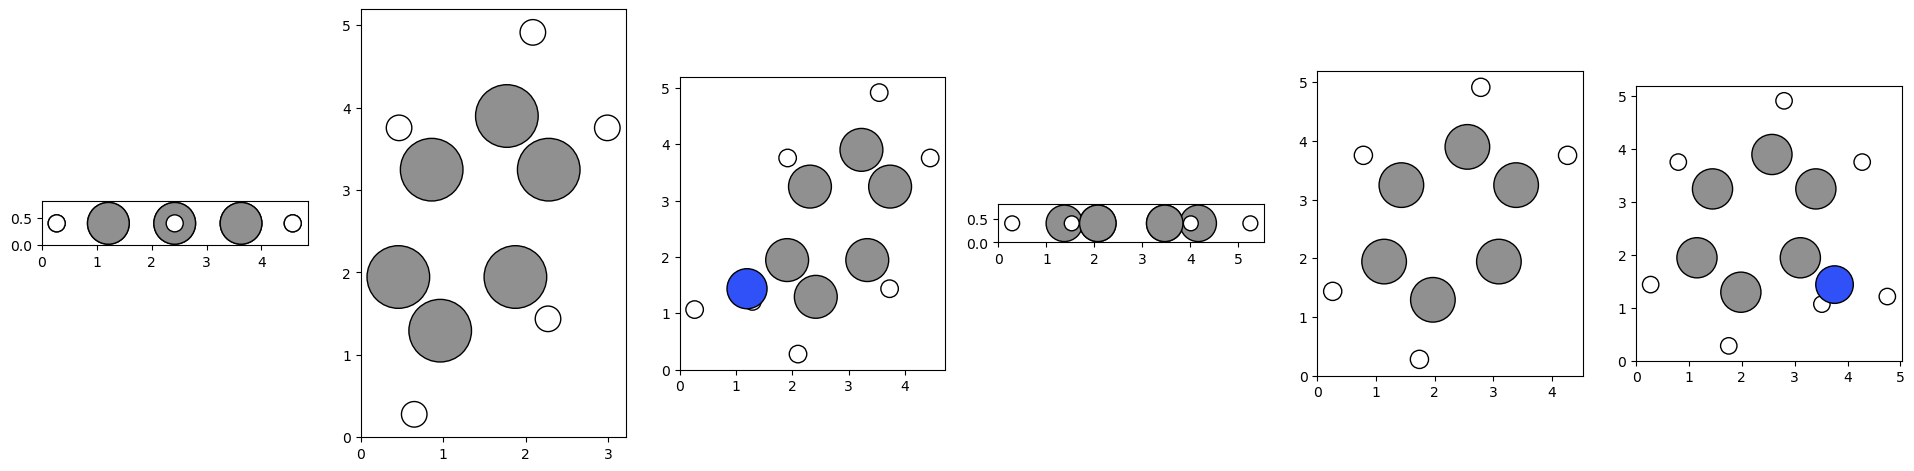

In [164]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

ligma = molecule('C6H6')
benzene = molecule('C6H6')
ligma.rotate(69, 'x')

ligma.rotate(126, '-z')
amine = molecule('NH2')

# print(ligma.get_chemical_symbols())
# ligma.pop()
# ligma.pop(5)


C_indices = np.array([5])
plane_indices = np.array([[32,48,16]])
cunt = 0
O_positions = []
num_O = 0
u_vecs, v_vecs = [], []
# for atom in ligand:
#     if atom.symbol == 'O':
u = plane_equation(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4])
# print(ligma.get_positions()[0], ligma.get_positions()[2], ligma.get_positions()[4], u)
u_vecs.append(u[:-1])
O_positions.append(ligma.get_positions()[len(ligma)-1])
# O_positions.append(ligand.get_positions()[atom.index])
num_O += 1
cunt += 1

# for O in range(num_O):
#     ligand.pop()
ligma.pop()

ligno_O = cp.copy(ligma)
fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(benzene, ax[0], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(benzene, ax[3], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(ligno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))


def attach_ligand(attach_site, ligand, replace_coordinates, ligand_center_direction, C_lig_direction, plane_ortho_vec, rotation_vec_to_plane, ligand_attach_index):
    ligand.rotate(ligand_center_direction, C_lig_direction)
    sigma = get_plane_angle(plane_ortho_vec, rotation_vec_to_plane)
    if sigma < 90:
        sigma = 180 - sigma
    ligand.rotate(sigma, C_lig_direction)
    T = get_components(ligand.get_positions()[ligand_attach_index], replace_coordinates)
    ligand.translate(T)
    attach_site.extend(ligand)

cunt = 0
for C,O,u in zip(C_indices, O_positions, u_vecs):
    amine = molecule('NH2') # initially in the yz plane
    # print(amine.get_chemical_symbols())
    amine_direction = Atoms('NH', [amine.get_positions()[0], amine.get_positions()[1]]) 
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    H2_vec = get_components(amine.get_positions()[0], amine.get_positions()[2])
    amangle = get_angle_cos(H1_vec, H2_vec)
    amine_direction.rotate(amangle/2.0, '-x') # angles are valid but apparently just don't look like it from the visualization
    H_vec = get_components(amine_direction.get_positions()[0], amine_direction.get_positions()[1])
    v = get_components(ligma.get_positions()[C], O) # get angle between vector and plane
    amine.rotate(H_vec, v)
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    sigma = get_plane_angle(u, H1_vec)
    if sigma < 90:
        sigma = 180 - sigma
    amine.rotate(sigma, v)
    T = get_components(amine.get_positions()[0], O)
    amine.translate(T)
    
    ligma.extend(amine)
    cunt += 1

plot_atoms(ligma, ax[2], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligma, ax[5], radii=0.5, rotation=('90x,90y,0z'))
write("/Users/adrianaladera/Desktop/yourmom/ass.html", ligma)

In [111]:
# view(ligma, viewer='x3d')

### Part 1: Adding amine to ligands using ASE (THIS SHIT IS NOT WORKING)

36.7029152335335
[-1.02837968  0.         -0.         -0.        ] (-5.1442791113633834, -6.837574214864702, 0.9323461903854444) 36.7029152335335 [-2.09749226  4.52942346 -0.55711099]


<Axes: >

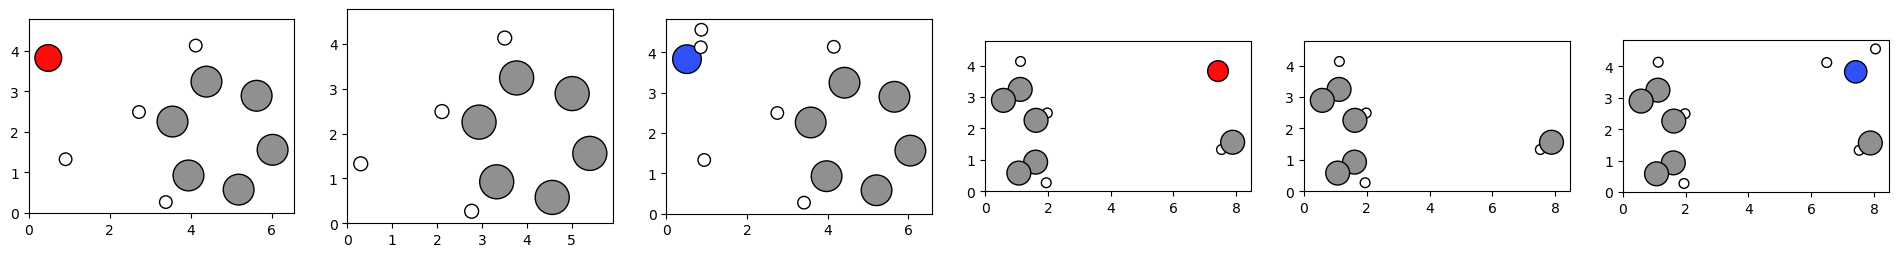

In [201]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mithamine = read(f'{path}POSCAR') # is an atoms object so it can be modified!
pos = mithamine.get_positions()
ligand = Atoms('C6H4O', positions = [pos[32],pos[24],pos[16],pos[56],pos[48],pos[40],  pos[64],pos[88],pos[84],pos[76],  pos[96]])
ligma = Atoms('C6H4O', positions = [pos[32],pos[24],pos[16],pos[56],pos[48],pos[40],  pos[64],pos[88],pos[84],pos[76],  pos[96]])

C_indices = np.array([32])
plane_indices = np.array([[32,48,16]])
cunt = 0
O_positions = []
num_O = 0
u_vecs, v_vecs = [], []
for atom in ligand:
    if atom.symbol == 'O':
        # print(vec, C_indices[cunt], atom.index)
        # vec = get_components(mithamine.get_positions()[C_indices[cunt]], mithamine.get_positions()[atom.index])
        u = plane_equation(ligand.get_positions()[0], ligand.get_positions()[2], ligand.get_positions()[4])
        # print(vec, vec[:-1])
        u_vecs.append(u[:-1])
        O_positions.append(ligand.get_positions()[atom.index])
        num_O += 1
        cunt += 1

for O in range(num_O):
    ligand.pop()

ligno_O = cp.copy(ligand)
fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(ligma, ax[0], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligma, ax[3], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(ligno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))

cunt = 0
for C,O,u in zip(C_indices, O_positions, u_vecs):
    amine = molecule('NH2')
    v = get_components(O, ligand.get_positions()[0]) # get angle between vector and plane
    H_plane = plane_equation(amine.get_positions()[0], amine.get_positions()[1], amine.get_positions()[2]) # rotate H until || with v vector
    theta = angle_between(H_plane[:-1], v)
    print(theta)
    # to rotate around a vector perpendicular to plane, just use plane coefficients
    amine.rotate(theta, u)
    print(H_plane, v,theta, u)
    # amine.rotate(-25, 'z')
    T = get_components(amine.get_positions()[0], O)
    amine.translate(T)
    
    ligand.extend(amine)
    cunt += 1

plot_atoms(ligand, ax[2], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(ligand, ax[5], radii=0.5, rotation=('90x,90y,0z'))

In [203]:
# view(ligand, viewer='x3d')

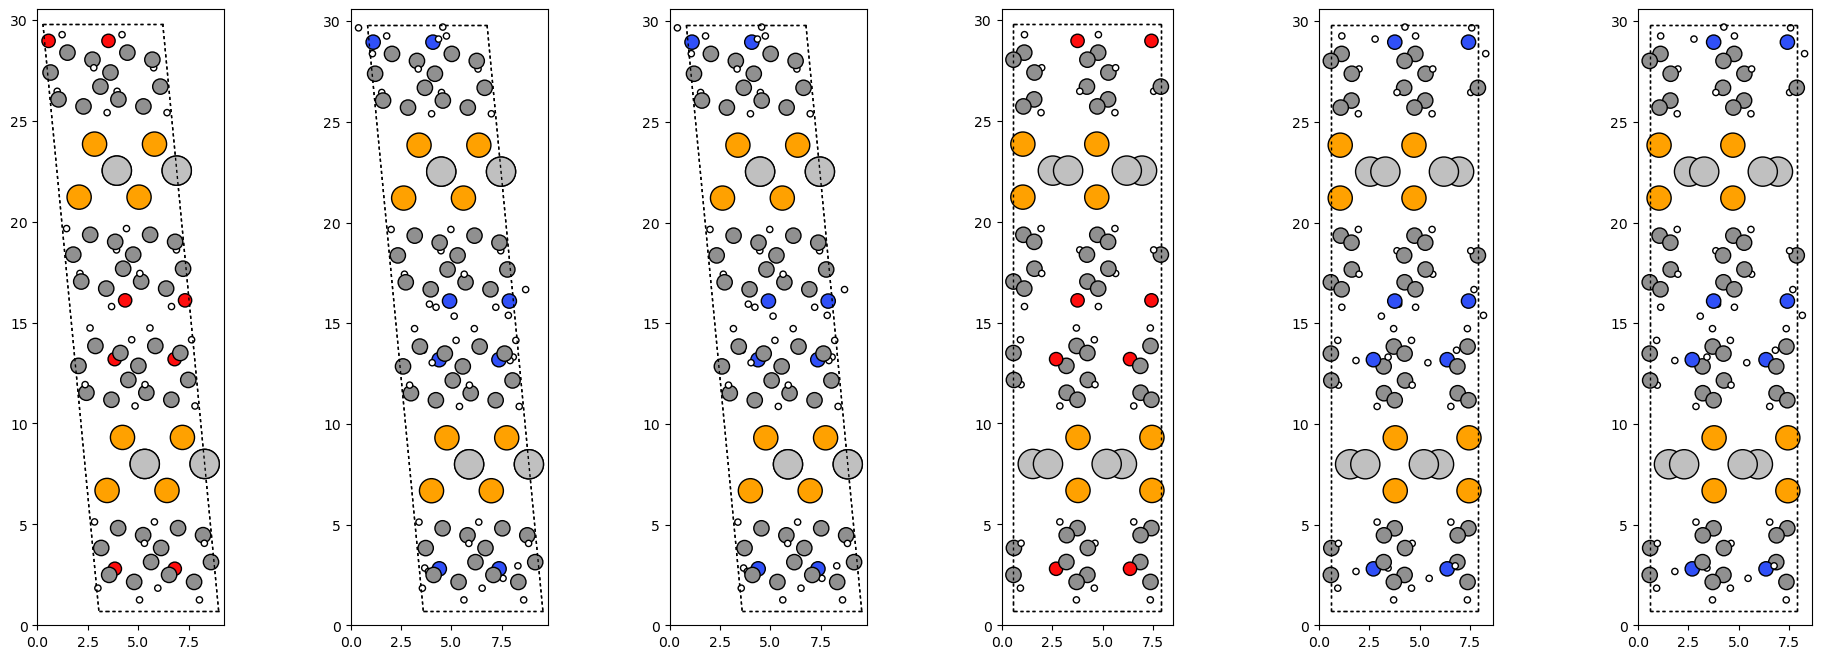

In [160]:
from ase.neighborlist import NeighborList
import math as meth
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mithamine = read(f'{path}POSCAR') # is an atoms object so it can be modified!
mith_nomod = read(f'{path}POSCAR') # is an atoms object so it can be modified!
H = Atoms('H')
Cl = Atoms('Cl')

C_indices = np.array([32, 34, 36, 38, 49, 51, 53, 55])
plane_indices = np.array([[32,48,16],[34,50,18],[36,52,20],[38,54,22],[49,33,17],[51,35,19],[53,37,21],[55,39,23]])

cunt = 0
O_positions = []
num_O = 0
u_vecs, v_vecs = [], []
for atom in mithamine:
    if atom.symbol == 'O':
        # print(vec, C_indices[cunt], atom.index)
        # vec = get_components(mithamine.get_positions()[C_indices[cunt]], mithamine.get_positions()[atom.index])
        u = plane_equation(mithamine.get_positions()[plane_indices[cunt][0]], mithamine.get_positions()[plane_indices[cunt][1]], mithamine.get_positions()[plane_indices[cunt][2]])
        # print(vec, vec[:-1])
        u_vecs.append(u[:-1])
        O_positions.append(mithamine.get_positions()[atom.index])
        num_O += 1
        cunt += 1

for O in range(num_O):
    mithamine.pop()

mithno_O = cp.copy(mithamine)

cunt = 0
for C,O,u in zip(C_indices, O_positions, u_vecs):
    amine = molecule('NH2') # initially in the yz plane
    # print(amine.get_chemical_symbols())
    amine_direction = Atoms('NH', [amine.get_positions()[0], amine.get_positions()[1]]) 
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    H2_vec = get_components(amine.get_positions()[0], amine.get_positions()[2])
    amangle = get_angle_cos(H1_vec, H2_vec)
    amine_direction.rotate(amangle/2.0, '-x') # angles are valid but apparently just don't look like it from the visualization
    H_vec = get_components(amine_direction.get_positions()[0], amine_direction.get_positions()[1])
    v = get_components(mithamine.get_positions()[C], O) # get angle between vector and plane

    amine.rotate(H_vec, v)
    H1_vec = get_components(amine.get_positions()[0], amine.get_positions()[1])
    sigma = get_plane_angle(u, H1_vec)
    if sigma < 90:
        sigma = 180 - sigma
    # amine.rotate(sigma, v)
    T = get_components(amine.get_positions()[0], O)
    amine.translate(T)
    
    mithamine.extend(amine)
    cunt += 1

fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(mith_nomod, ax[0], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mithno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mithamine, ax[2], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mith_nomod, ax[3], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(mithno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(mithamine, ax[5], radii=0.5, rotation=('90x,90y,0z'))

write(f"{path}mithrene-amine.vasp", mithamine)

(-4.764351002314184, -0.5089534392498396, -0.3331876664643829) 32 96
(5.1442791113633834, 6.837574214864702, -0.9323461903854444) 34 97
(-5.1442791164598916, 6.837574214864702, 0.932346742724457) 36 98
(-0.7937213164806232, -0.48742602661028744, -0.9323461903854444) 38 99
(0.793721085740108, -0.48742602661028744, 0.932346742724457) 49 100
(-1.1736490217458095, -0.5089532194998458, 0.3331876664643829) 51 101
(1.1736488495438033, -0.5089532194998458, -0.3331876664643829) 53 102
(4.7643510854461875, -0.5089534392498396, 0.3331876664643829) 55 103


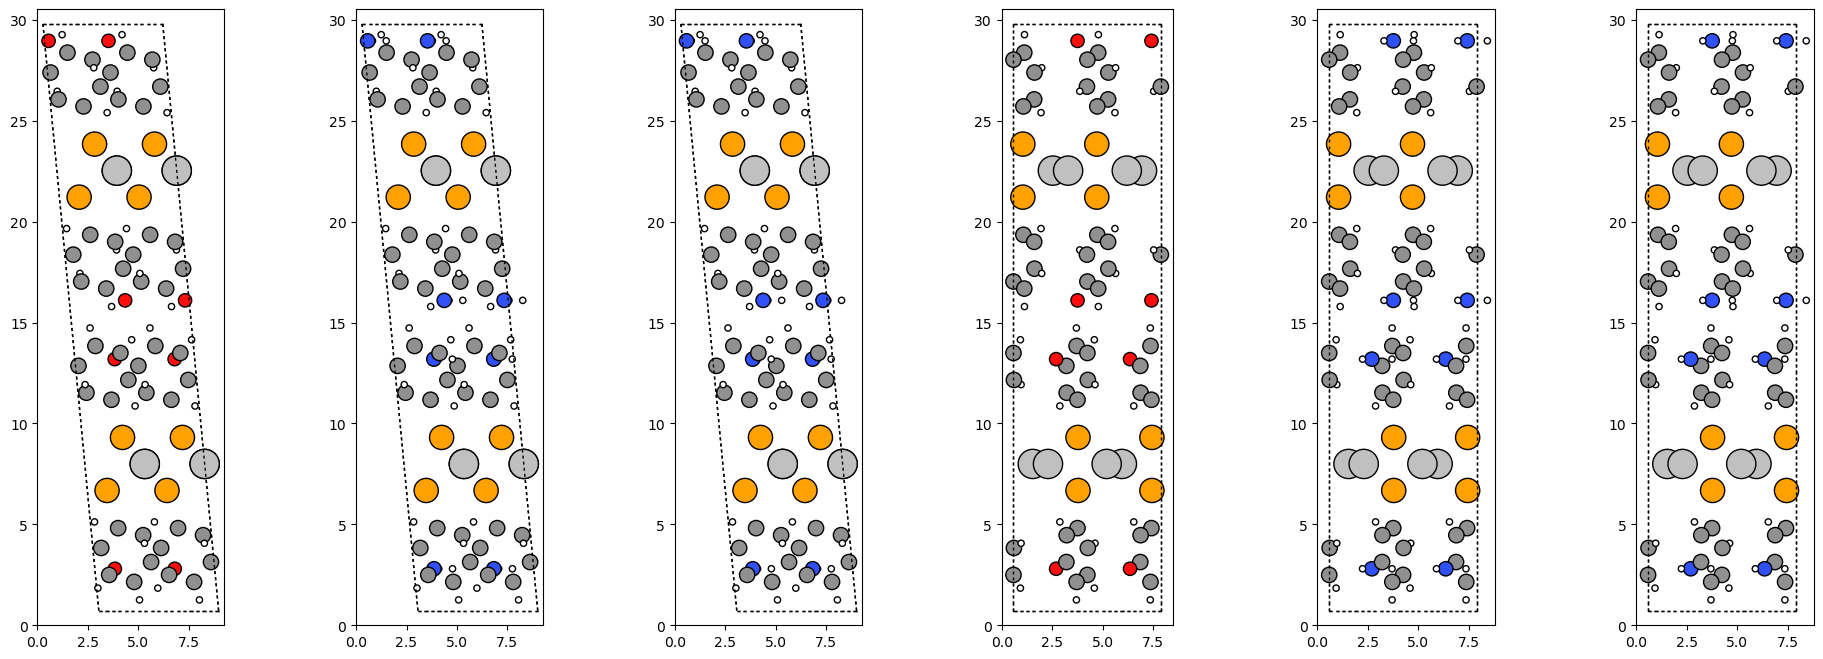

In [153]:
# fallback good one in case the rotation shit doesn't work
from ase.neighborlist import NeighborList
import math as meth
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene-amine/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mithamine = read(f'{path}POSCAR') # is an atoms object so it can be modified!
mith_nomod = read(f'{path}POSCAR') # is an atoms object so it can be modified!
H = Atoms('H')
Cl = Atoms('Cl')

C_indices = np.array([32, 34, 36, 38, 49, 51, 53, 55])

cunt = 0
O_positions = []
num_O = 0
rotation_vecs = []
for atom in mithamine:
    if atom.symbol == 'O':
        print(vec, C_indices[cunt], atom.index)
        vec = get_components(mithamine.get_positions()[C_indices[cunt]], mithamine.get_positions()[atom.index])
        rotation_vecs.append(vec)
        O_positions.append(mithamine.get_positions()[atom.index])
        num_O += 1
        cunt += 1

for O in range(num_O):
    mithamine.pop()

mithno_O = cp.copy(mithamine)

cunt = 0
for C,O in zip(C_indices, O_positions):
    amine = molecule('NH2')
    amine.rotate(90, 'y')
    amine.rotate(-25, 'z')
    # amine.rotate(85, rotation_vecs[cunt])
    # amine.rotate(-25, rotation_vecs[cunt])
    v = get_components(amine.get_positions()[0], O)
    amine.translate(v)
    
    mithamine.extend(amine)
    cunt += 1

fig, ax = plt.subplots(1,6, figsize=(24,8))
plot_atoms(mith_nomod, ax[0], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mithno_O, ax[1], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mithamine, ax[2], radii=0.5, rotation=('90x,180y,0z'))
plot_atoms(mith_nomod, ax[3], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(mithno_O, ax[4], radii=0.5, rotation=('90x,90y,0z'))
plot_atoms(mithamine, ax[5], radii=0.5, rotation=('90x,90y,0z'))

write(f"{path}mithrene-amine.vasp", mithamine)

In [142]:
view(mith_nomod, viewer='x3d')

In [76]:
def modify_and_attach_molecule(molecule, slab, group, h_index, c_index, bond_length=1.7, direction=1):
    # Modify the molecule by removing a specific H atom
    modified_molecule = molecule.copy()
    modified_molecule.pop(h_index)
    # Attach the molecule to each site in the group
    for atom in group:
        # Get the position of the site and the specific C atom
        site_pos = atom.position
        c_pos = modified_molecule[c_index].position
        # Calculate the desired position for the carbon atom
        desired_c_pos = site_pos.copy()
        desired_c_pos[2] += direction * bond_length
        # Calculate the translation vector for the molecule
        translation_vector = desired_c_pos - c_pos
        # Create a copy of the modified molecule and translate the whole molecule
        new_molecule = modified_molecule.copy()
        new_molecule.translate(translation_vector)
        # Extend the slab with the new molecule
        slab.extend(new_molecule)

In [77]:
def attach_molecules_to_slab(molecule_list, slab, groups, molecule_indices, directions):
    # Create a copy of the slab to modify
    modified_slab = slab.copy()
    # For each group, corresponding molecule index and direction
    for group, molecule_index, direction in zip(groups, molecule_indices, directions):
        # Get the molecule from the list
        molecule = molecule_list[molecule_index]
        # Determine which H and C atom to use based on the group index
        if direction == 1:  # for group1
            h_index = min([atom.index for atom in molecule if atom.symbol == 'H'], key=lambda idx: molecule[idx].position[2])
            c_index = min([atom.index for atom in molecule if atom.symbol == 'C'], key=lambda idx: molecule[idx].position[2])
        else:  # for group2
            h_index = max([atom.index for atom in molecule if atom.symbol == 'H'], key=lambda idx: molecule[idx].position[2])
            c_index = max([atom.index for atom in molecule if atom.symbol == 'C'], key=lambda idx: molecule[idx].position[2])
        # Modify and attach the molecule to the slab at the sites in the group
        modify_and_attach_molecule(molecule, modified_slab, group, h_index, c_index, direction=direction)
    # Return the modified slab
    return modified_slab